Box-Cox変換の説明用サンプルコード

In [2]:
# coding: utf-8

In [3]:
import numpy as np

def box_cox(x, alpha):
    if alpha == 0:
        return np.log(x)
    else:
        return (x**alpha-1)/alpha

In [4]:
x = np.arange(0.1, 5.1, 0.1)
alpha = -1
y = []
for i in range(6):
    y.append(box_cox(x, alpha))
    alpha += 0.5

/opt/anaconda3/envs/graduation_thesis/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 22793 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/envs/graduation_thesis/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 25563 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/envs/graduation_thesis/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 22793 missing from current font.
  font.set_text(s, 0, flags=flags)
/opt/anaconda3/envs/graduation_thesis/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 25563 missing from current font.
  font.set_text(s, 0, flags=flags)


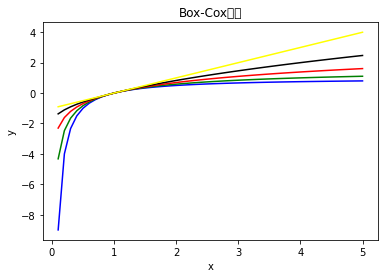

In [5]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.set_title("Box-Cox変換")
ax.set_xlabel('x')
ax.set_ylabel('y')
c1,c2,c3,c4,c5 = "blue","green","red","black","yellow"      # 各プロットの色
l1,l2,l3,l4,l5 = "alpha=-1","alpha=-0.5","alpha=0","alpha=0.5","alpha=1"   # 各ラベル
ax.plot(x, y[0], color=c1, label=l1)
ax.plot(x, y[1], color=c2, label=l2)
ax.plot(x, y[2], color=c3, label=l3)
ax.plot(x, y[3], color=c4, label=l4)
ax.plot(x, y[4], color=c5, label=l5)
plt.show()


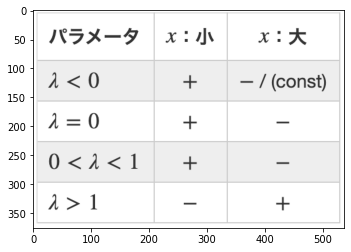

In [6]:
#スケール変換の特徴をまとめると、下表のようになる。
#ここで、++は変換によってxxのスケールが伸びること、−−はxxのスケールが縮むことを表している
from PIL import Image

im = Image.open("box_cox.png", "r")
plt.imshow(np.array(im))

***
**このような特徴からある分布に対してBox-Cox変換を施すと横軸の値xxが小さい領域のスケールを縮めて、xxが大きい領域のスケールを伸ばすというような変化をすることが分かる  
Box-Cox変換とは、適切なパラメータalphaを選ぶことで(ライブラリを利用すれば自動で選んでくれる)変数のスケールを変えて分布を正規分布(ガウス分布)の形に変えるために用いられる変換である  
以下に正規分布に近づける例を記す**
***

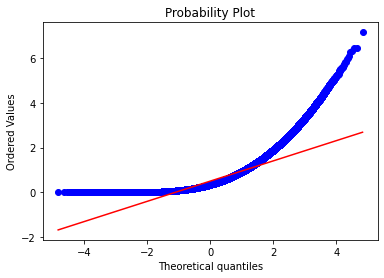

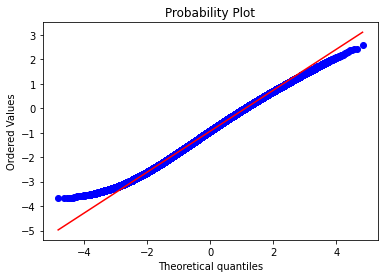

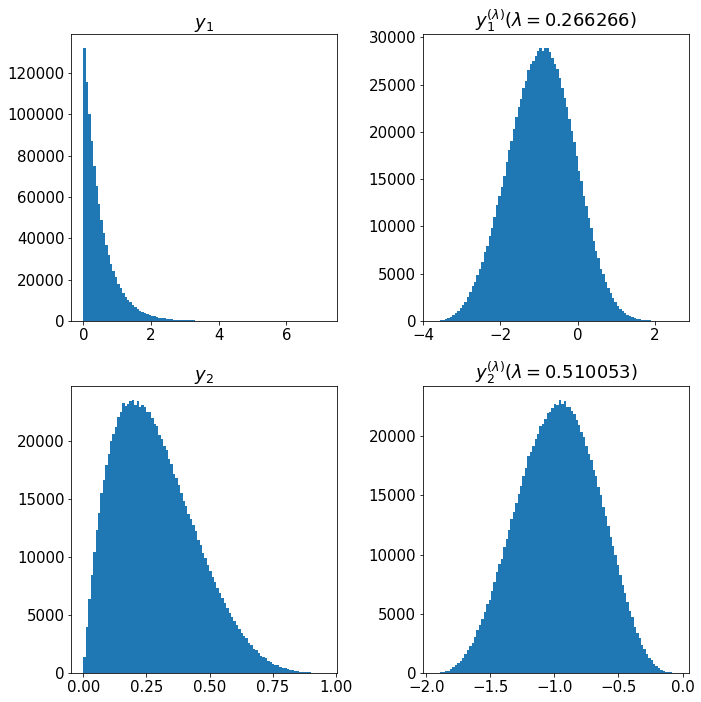

In [7]:
from scipy import stats
import pylab
y1 = np.random.exponential(scale=0.5, size=1000000)
y1_lambda, lmax1 = stats.boxcox(y1)
y2 = np.random.beta(2.0, 5.0, size=1000000)
y2_lambda, lmax2 = stats.boxcox(y2)
stats.probplot(y1, dist="norm", plot=pylab)
plt.show()
stats.probplot(y1_lambda, dist="norm", plot=pylab)
plt.show()
bins = 100
plt.rcParams["font.size"] = 15
plt.figure(figsize=(10, 10))
plt.subplot(2, 2, 1)
plt.hist(y1, bins=bins)
plt.title(r'$y_1$')
plt.subplot(2, 2, 2)
plt.hist(y1_lambda, bins=bins)
plt.title(r'$y_1^{(\lambda)} (\lambda=%f)$' % lmax1)
plt.subplot(2, 2, 3)
plt.hist(y2, bins=bins)
plt.title(r'$y_2$')
plt.subplot(2, 2, 4)
plt.hist(y2_lambda, bins=bins)
plt.title(r'$y_2^{(\lambda)} (\lambda=%f)$' % lmax2)
plt.tight_layout()
plt.savefig('figure.png')
plt.show()